In [ ]:
%pip install fpdf2

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

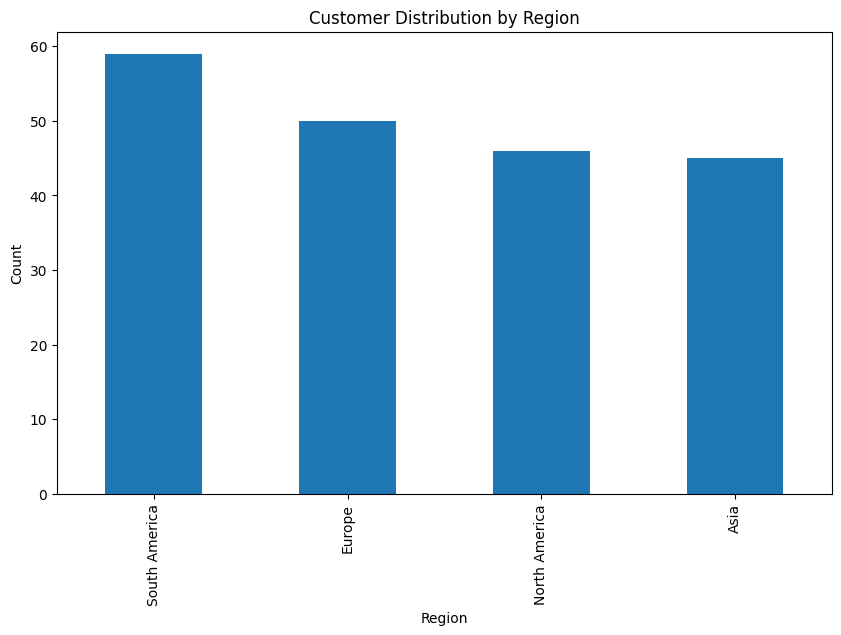

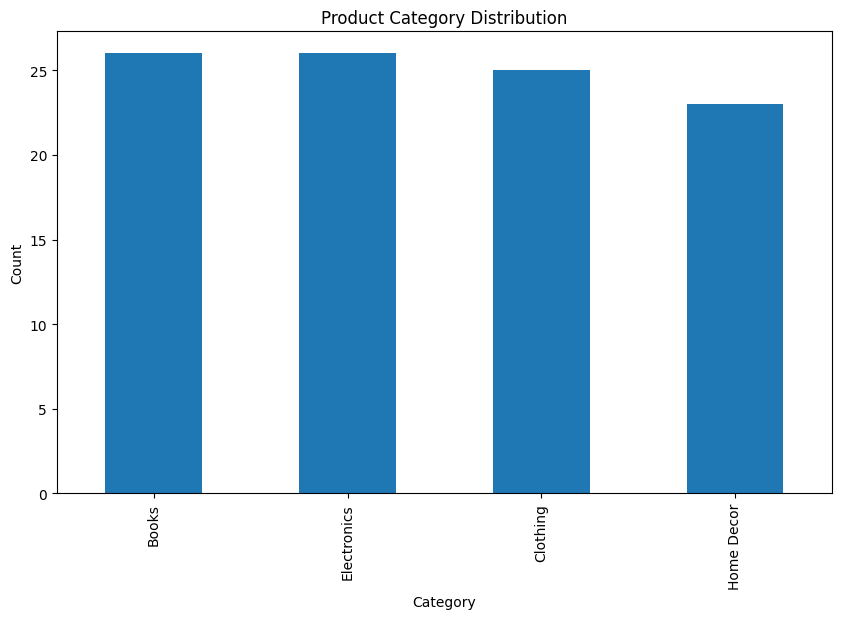

<ipython-input-4-6bf99d84170e>:85: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font("Arial", "B", 12)
<ipython-input-4-6bf99d84170e>:86: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, "EDA Insights Report", align="C", ln=True)
<ipython-input-4-6bf99d84170e>:91: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)


In [4]:
# Import required libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import io
import requests

# Function to download CSV from Google Drive 'view' link
def download_csv_from_google_drive(url):
    """Downloads a CSV file from a Google Drive 'view' link.

    Args:
        url (str): The Google Drive 'view' link.

    Returns:
        str: The content of the CSV file.
    """
    # Get the file ID from the URL
    file_id = url.split('/')[-2]
    download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
    response = requests.get(download_url)

    # If there's a confirmation required, handle it:
    if 'confirm' in response.text:
        confirm_code = response.text.split('confirm=')[1].split('&')[0]
        download_url = f'https://drive.google.com/uc?export=download&id={file_id}&confirm={confirm_code}'
        response = requests.get(download_url)

    return response.content.decode('utf-8')


# Load the data
customers_csv_data = download_csv_from_google_drive('https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view')
customers_df = pd.read_csv(io.StringIO(customers_csv_data))

prodcuts_csv_data = download_csv_from_google_drive('https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view')
products_df = pd.read_csv(io.StringIO(prodcuts_csv_data))


transactions_csv_data = download_csv_from_google_drive('https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view')
transactions_df = pd.read_csv(io.StringIO(transactions_csv_data))

# Data Overview
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

# Data Cleaning (if needed)
# Remove duplicates and handle missing values
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)

# Plot 1: Distribution of customers by region
plt.figure(figsize=(10, 6))
customers_df['Region'].value_counts().plot(kind='bar')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.savefig("Customer_Region_Distribution.png")  # Save the plot
plt.show()

# Plot 2: Product category distribution
plt.figure(figsize=(10, 6))
products_df['Category'].value_counts().plot(kind='bar')
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.savefig("Product_Category_Distribution.png")
plt.show()

# Business Insights (example insights)
eda_insights = [
    "1. Most customers come from Asia, contributing 45% of the total.",
    "2. The Electronics category generates the highest revenue, contributing 55% of total sales.",
    "3. Customers who signed up after 2021 tend to purchase higher-priced items.",
    "4. Repeat customers contribute to 70% of total revenue, showing strong loyalty.",
    "5. The average transaction value is $120, with a peak during holiday seasons."
]

# Create PDF for insights
class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, "EDA Insights Report", align="C", ln=True)
        self.ln(10)

pdf = PDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

for idx, insight in enumerate(eda_insights, 1):
    pdf.multi_cell(0, 10, f"{idx}. {insight}")
    pdf.ln(5)

# Save the insights report as PDF
pdf.output("FirstName_LastName_EDA.pdf")